In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def simulate_predation(parameters):
    if parameters['predator_population'] == 0 or parameters['prey_population'] == 0:
        return 0
    predator_population = parameters['predator_population']
    prey_rate = min(1, parameters['prey_population'] / parameters['carrying_capacity'])
    return np.random.binomial(predator_population, prey_rate)

def advance_generation(parameters, prey_eaten):
    L = max(0, parameters['prey_population'] - prey_eaten)
    K = parameters['carrying_capacity']
    parameters['prey_population'] = int(L + (parameters['prey_reproduction_rate'] * L * (K-L)/K))
    parameters['predator_population'] = int(prey_eaten / parameters['predator_birth_constant']) if prey_eaten > 0 else 0

def populations_simulate(parameters):
    population_df = pd.DataFrame(columns=['Generation', 'Predator', 'Prey']).set_index('Generation')
    population_df.loc[0] = [parameters['predator_population'], parameters['prey_population']]
    for generation in np.arange(1, 1 + parameters['generations']):
        prey_eaten = simulate_predation(parameters)
        advance_generation(parameters, prey_eaten)
        population_df.loc[generation] = [parameters['predator_population'], parameters['prey_population']]
    return population_df

In [3]:
style = {'description_width': 'initial'}

prey_population = widgets.IntSlider(description='Prey Population Size', value=300, min=0, max=1000, style=style)
predator_population = widgets.IntSlider(description='Predator Population Size', value=200, min=0, max=1000, style=style)

prey_reproduction_rate = widgets.FloatSlider(description='Prey Reproduction Rate', value=0.75, min=0.5, max=1, style=style)
predator_birth_constant = widgets.FloatSlider(description='Predator Birth Constant (c)', value=0.8, min=0.1, max=2, style=style)

carrying_capacity = widgets.IntSlider(description='Prey Carrying Capacity', value=500, min=0, max=1000, style=style)
generations = widgets.IntSlider(description='Generations', value=100, min=0, max=250, style=style)

reset_populations_button = widgets.Button(description='Reset', layout=widgets.Layout(width='100%', height='100%'))
simulate_populations_button = widgets.Button(description='Simulate', layout=widgets.Layout(width='100%', height='100%'))
    
def show_widget():
    clear_output()
    population_box = widgets.VBox([prey_population, predator_population])
    reproduction_box = widgets.VBox([prey_reproduction_rate, predator_birth_constant])
    general_box = widgets.VBox([carrying_capacity, generations])
    reset_box = widgets.HBox([reset_populations_button])
    simulate_box = widgets.HBox([simulate_populations_button])
    
    display(widgets.HBox([population_box, reproduction_box, general_box]))
    display(widgets.VBox([reset_box, simulate_box]))
    
def get_populations_parameters():
    parameters = {}
    parameters['prey_population'] = prey_population.value
    parameters['predator_population'] = predator_population.value
    parameters['prey_reproduction_rate'] = prey_reproduction_rate.value
    parameters['predator_birth_constant'] = predator_birth_constant.value
    parameters['carrying_capacity'] = carrying_capacity.value
    parameters['generations'] = generations.value
    return parameters

@reset_populations_button.on_click
def reset_populations(_):
    prey_population.value=300
    predator_population.value=200
    prey_reproduction_rate.value=0.75
    predator_birth_constant.value=0.8
    carrying_capacity.value=500
    generations.value=100
    show_widget()
    
@simulate_populations_button.on_click
def run_simulation_populations(_):
    parameters = get_populations_parameters()
    show_widget()
    simulation_df = populations_simulate(parameters)
    
    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_subplot(121)
    simulation_df.plot(ax=ax1)
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Population Size')
    ax1.legend(frameon=False, loc='upper left')
    
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    filtered_df = simulation_df.iloc[::5, :].reset_index()
    table = ax2.table(cellLoc='center', cellText=filtered_df.values, bbox=[0, 0, 1, 1], colLabels=filtered_df.columns)

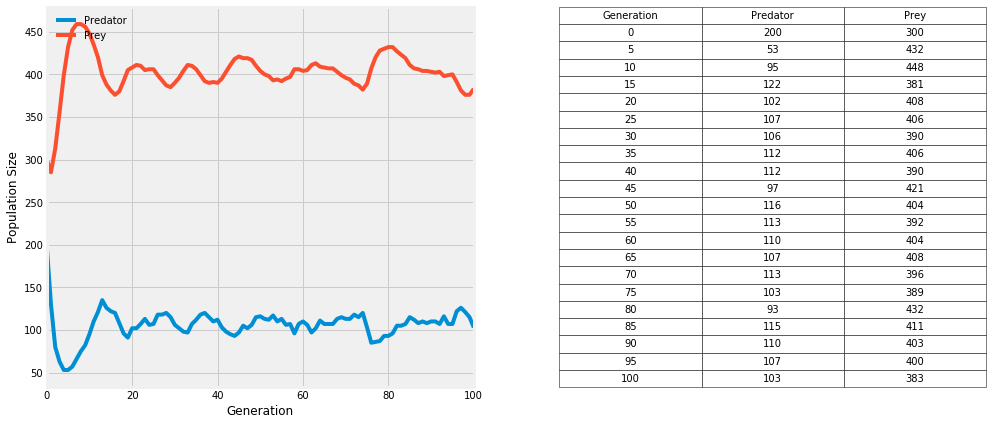

In [4]:
show_widget()

Notebook developed by: Andy Sheu

Data Science Modules: http://data.berkeley.edu/education/modules